In [12]:
import pandas as pd
import numpy as np
import random
import requests

# Don't forget to 'pip install fastf1'
import fastf1 as ff1
from fastf1 import plotting
# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [14]:
# Specify the number of rounds we want in our plot (in other words, specify the current round)
rounds = 18

# Initiate an empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = ergast_retrieve(f'current/{i}/driverStandings')
    
    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}
    
    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        # Store the drivers' position
        current_round[driver] = int(position)
        
        # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']


    # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
    
# Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')

C:\Users\aryamish\AppData\Local\Temp\ipykernel_26648\110932836.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
C:\Users\aryamish\AppData\Local\Temp\ipykernel_26648\110932836.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
C:\Users\aryamish\AppData\Local\Temp\ipykernel_26648\110932836.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
C:\Users\aryamish\AppData\Local\Temp\ipykernel_26648\110932836.py:34: FutureWarning: The frame

In [19]:
all_championship_standings

,LEC,SAI,HAM,RUS,MAG,BOT,OCO,TSU,ALO,ZHO,...,ALB,RIC,NOR,LAT,HUL,PER,VER,GAS,VET,DEV
round,,,,,,,,,,,,,,,,,,,,,
1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,NaN,NaN
2,1,2,5,4,8,9,6,11,13,14,...,18,19,10,20,17,7,3,12,NaN,NaN
3,1,3,5,2,9,10,7,13,14,15,...,16,11,8,20,19,4,6,12,21.0,NaN
4,1,5,7,4,10,8,9,12,15,16,...,17,11,6,21,20,3,2,13,14.0,NaN
5,1,5,6,4,10,8,9,12,16,18,...,15,11,7,21,20,3,2,13,14.0,NaN
6,2,5,6,4,10,8,9,11,15,18,...,16,12,7,21,20,3,1,13,14.0,NaN
7,2,5,6,4,10,8,9,12,13,18,...,16,11,7,21,20,3,1,14,15.0,NaN
8,3,5,6,4,12,8,9,15,11,18,...,16,13,7,21,20,2,1,10,14.0,NaN
9,3,5,6,4,12,8,9,15,10,16,...,17,13,7,21,20,2,1,11,14.0,NaN


In [18]:
# Melt data so it can be used as input for plot
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])
all_championship_standings_melted

,round,variable,value
0,1,LEC,1.0
1,2,LEC,1.0
2,3,LEC,1.0
3,4,LEC,1.0
4,5,LEC,1.0
...,...,...,...
391,14,DEV,NaN
392,15,DEV,NaN
393,16,DEV,20.0
394,17,DEV,20.0


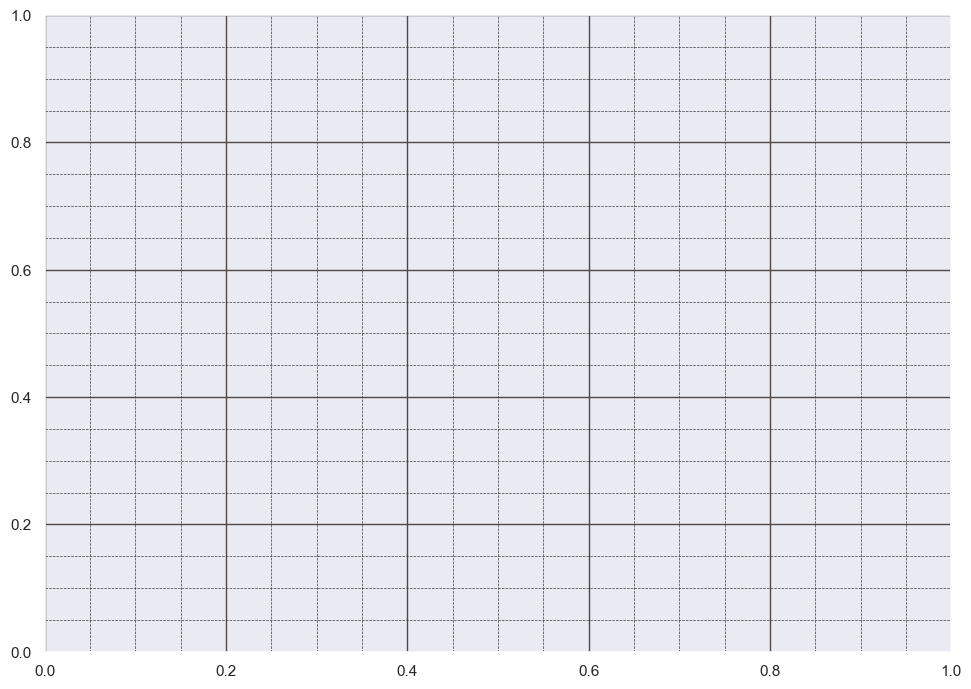

In [20]:
# Increase the size of the plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()



KeyError: 0

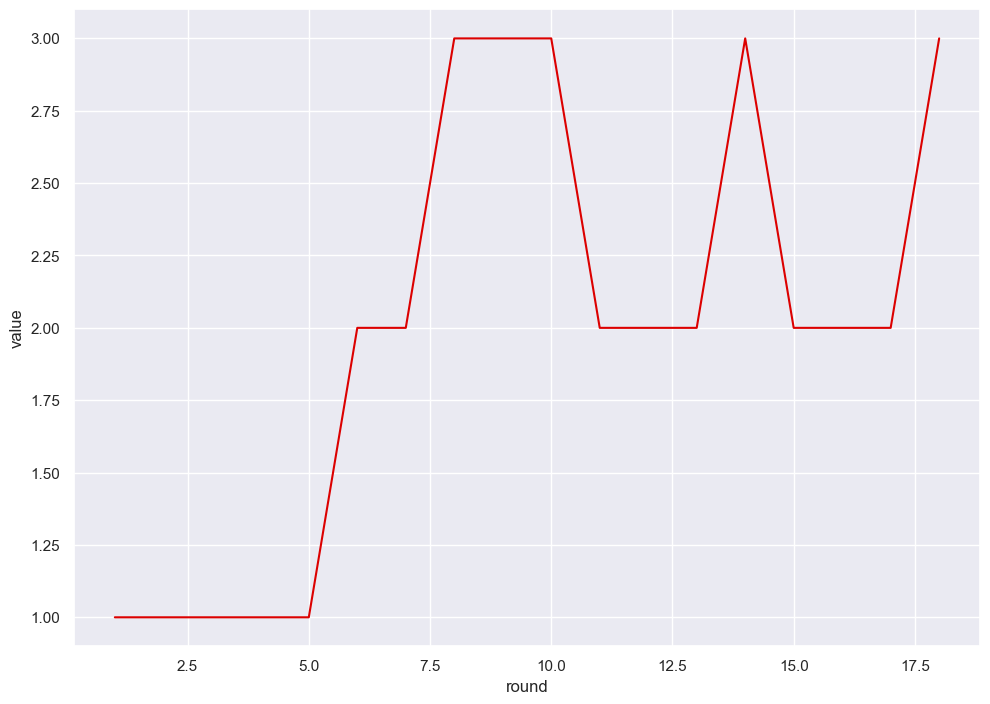

In [21]:
# Set the title of the plot
ax.set_title("2021 Championship Standings until round 18")

# Draw a line for every driver in the data by looping through all the standings
# The reason we do it this way is so that we can specify the team color per driver
for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver], 
        color=ff1.plotting.team_color(driver_team_mapping[driver])
    )



In [22]:
# Invert Y-axis to have championship leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

# Disable the gridlines 
ax.grid(False)


# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

# Save the plot
plt.savefig('img/championship_standings.png')

<Figure size 1170x827 with 0 Axes>

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

c:\Users\aryamish\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Pre-Season Test - Practice 1 [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 31: Encountered 1 timing integrity error(s) near lap(s): [2].
This might be a bug and should be reported.
api            INFO 	Fetching timing app data...


KeyboardInterrupt: 